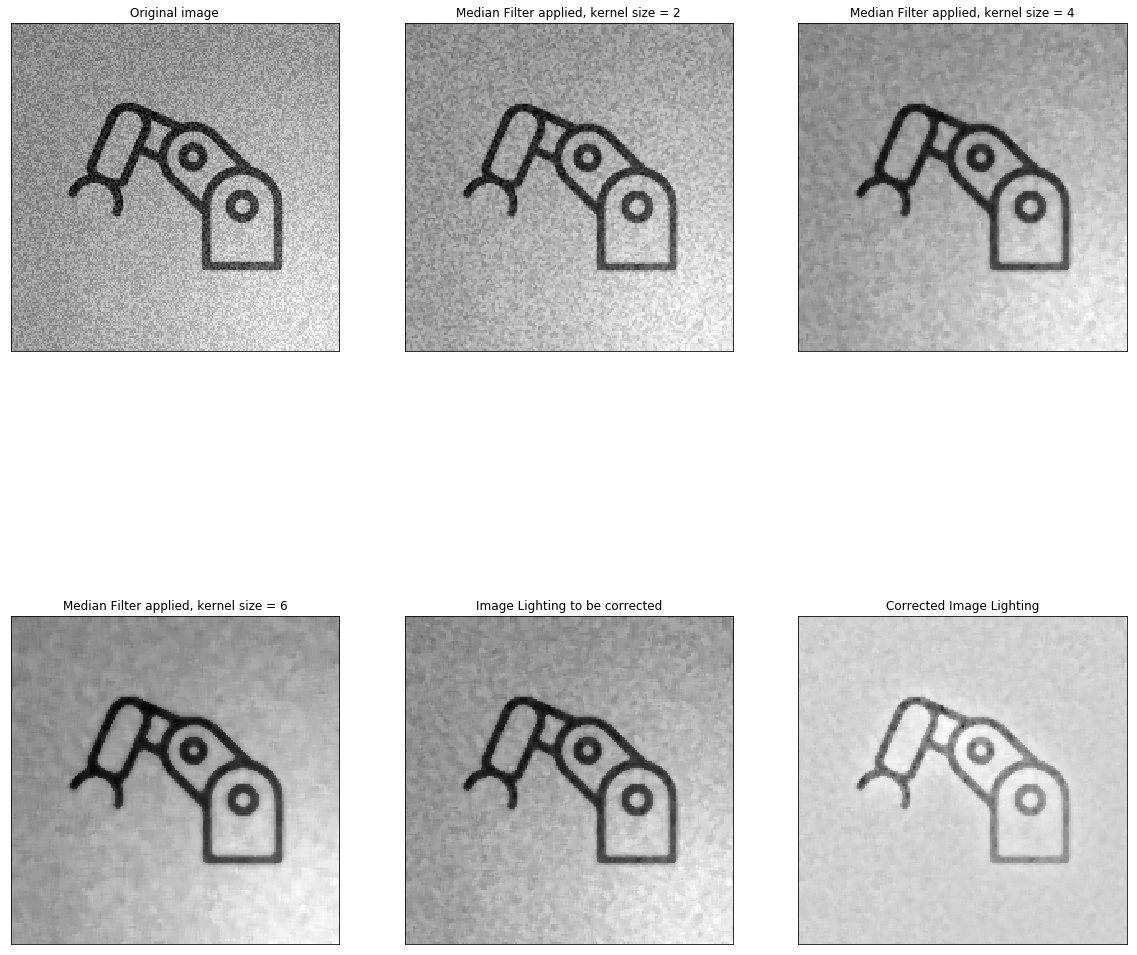

In [20]:
from __future__ import print_function
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import numpy as np
import os
import shutil
import sys
from scipy import ndimage
from sklearn.model_selection import train_test_split

import matplotlib.image as img
import math

% matplotlib inline

# based on the results shown below, kernel size 2 isn't enough
im_saltpepper = img.imread('data2/Arms/4.png')
im_median1 = ndimage.median_filter(im_saltpepper, size = 2)
im_saltpepper = img.imread('data2/Arms/4.png')

# based on the results shown below, kernel size 4 is good
im_median2 = ndimage.median_filter(im_saltpepper, size = 4)
im_saltpepper = img.imread('data2/Arms/4.png')

im_median3 = ndimage.median_filter(im_saltpepper, size = 6)
im_saltpepper = img.imread('data2/Arms/4.png')

im_lightcorrection = im_median2

# applying some slight gaussian filtering to make lighting fix easier
im_gauss = ndimage.gaussian_filter(im_lightcorrection, sigma = 9)

# searching for 'lightest' pixel value
maxValue = (im_lightcorrection - im_gauss).max()

# searching for 'darkest' pixel value
minValue = (im_lightcorrection - im_gauss).min()

# calculating the difference to even the image contrast
diff = np.log2(im_lightcorrection) - np.log2(im_gauss)

# applying the difference to the image, next - showing the results
im_newlight = (diff-minValue)/(maxValue-minValue)

fig = plt.figure(figsize = (20, 20))

plt.subplot(231), plt.imshow(im_saltpepper, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(im_median1, cmap = 'gray')
plt.title('Median Filter applied, kernel size = 2'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(im_median2, cmap = 'gray')
plt.title('Median Filter applied, kernel size = 4'), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(im_median3, cmap = 'gray')
plt.title('Median Filter applied, kernel size = 6'), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(im_lightcorrection, cmap = 'gray')
plt.title('Image Lighting to be corrected'), plt.xticks([]), plt.yticks([])

plt.subplot(236), plt.imshow(im_newlight, cmap = 'gray')
plt.title('Corrected Image Lighting'), plt.xticks([]), plt.yticks([])
plt.show()